In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#getting data
df = pd.read_csv('C:/Users/Yogendra/Downloads/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#understandung data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


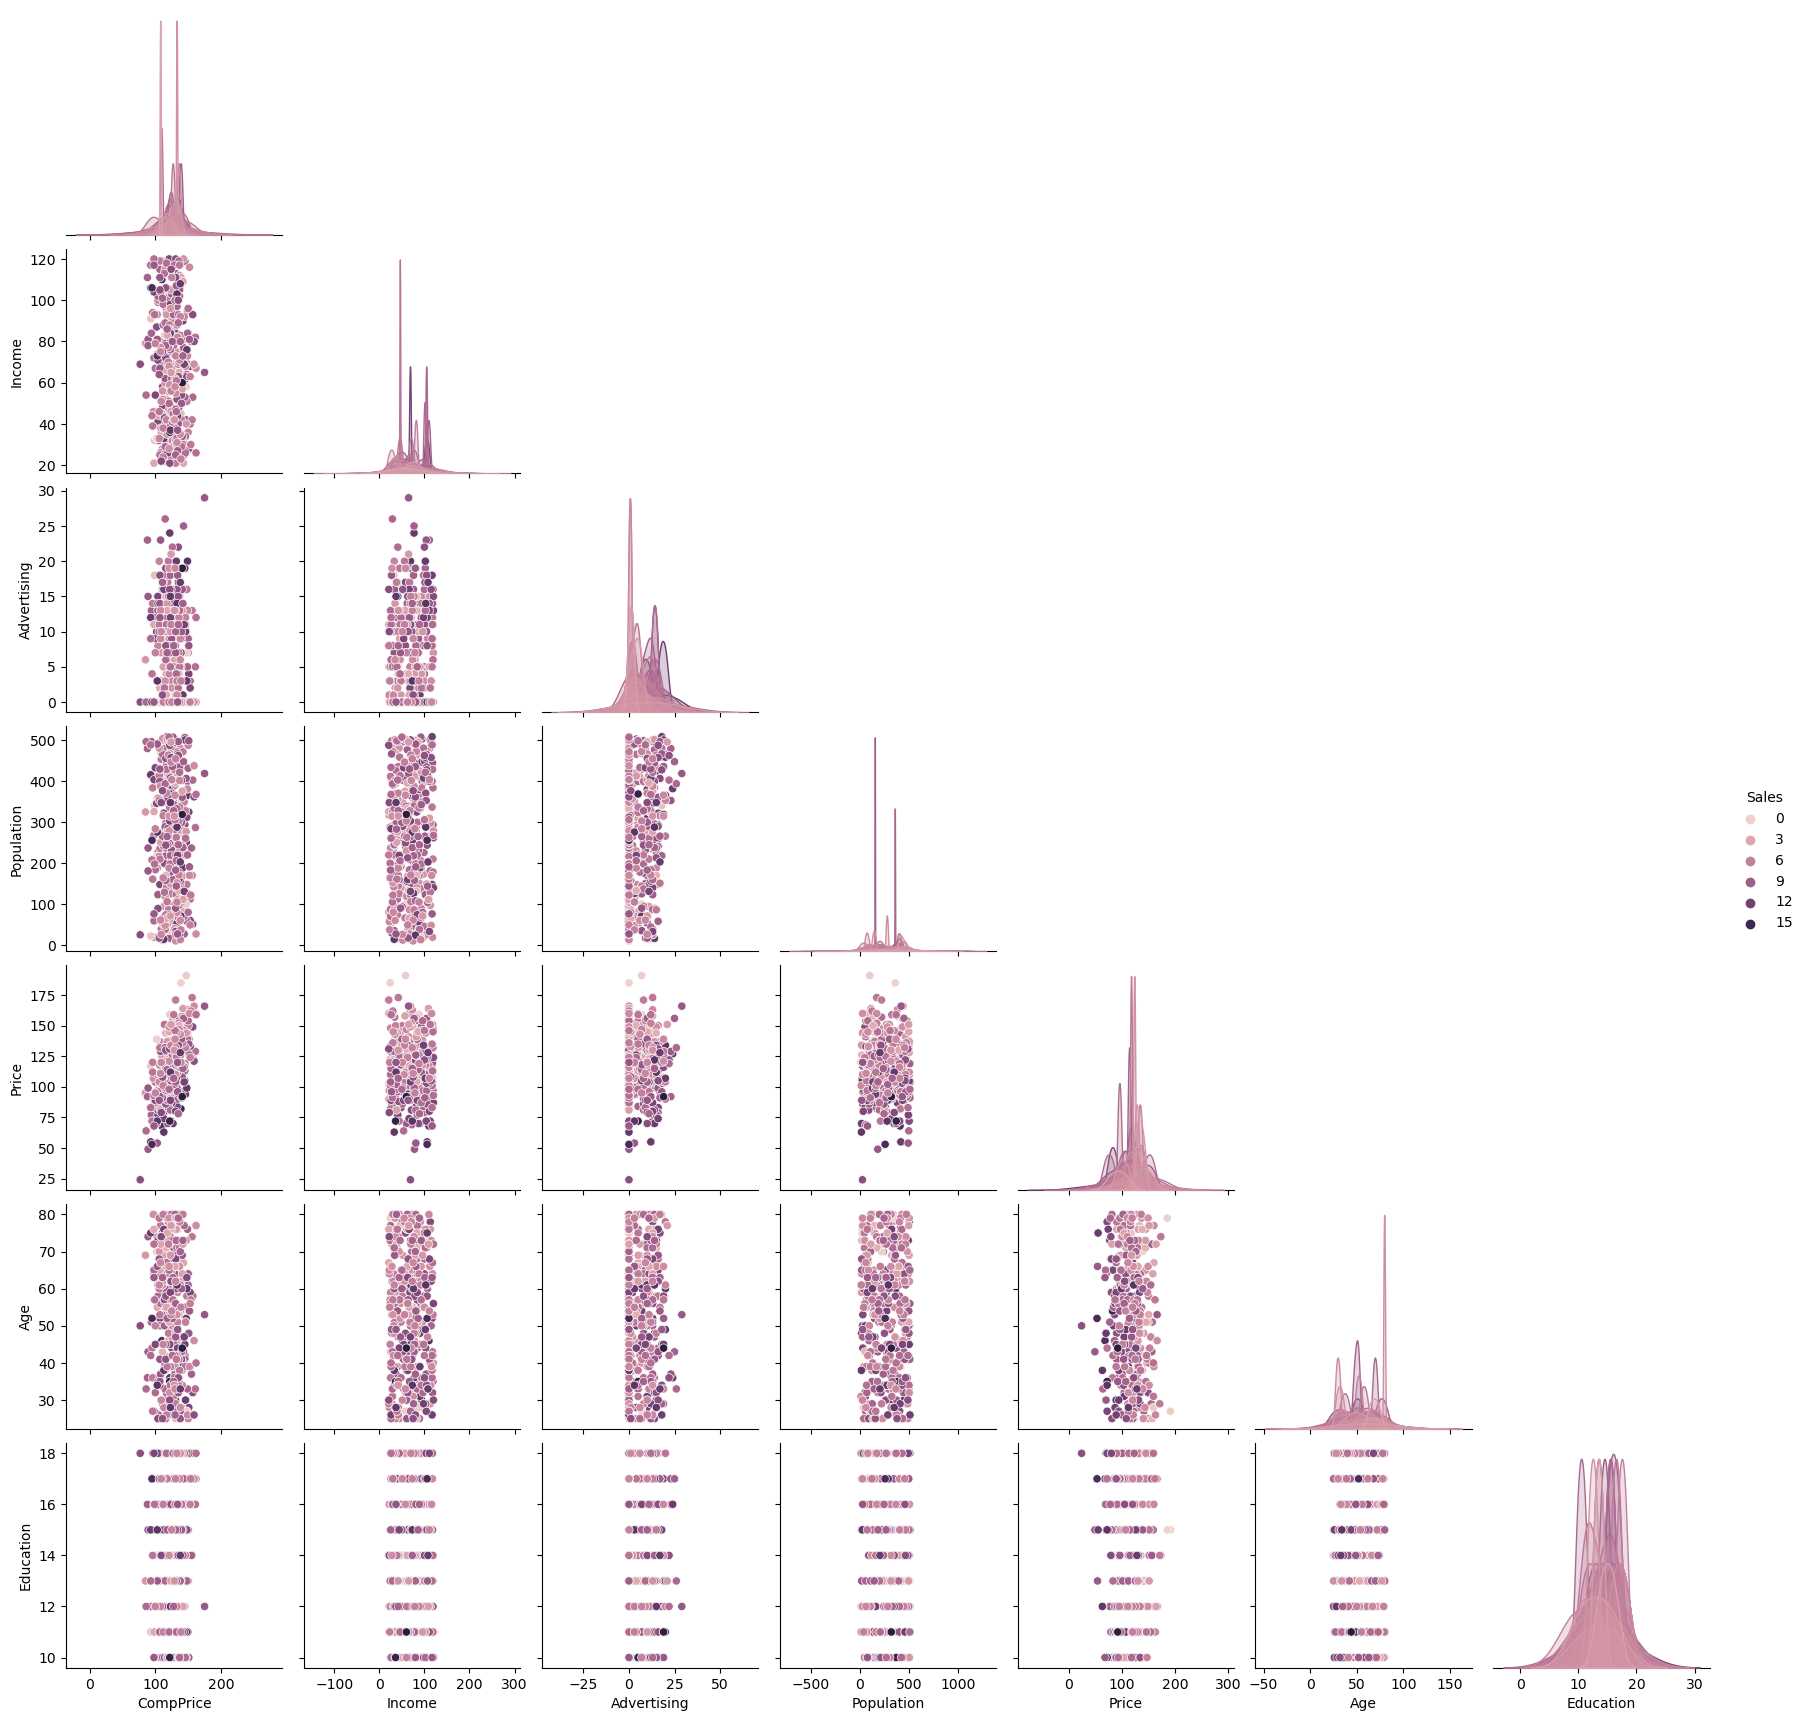

In [4]:
sns.pairplot(df, hue="Sales", corner=True)

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_13532\603820402.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest")


<Axes: >

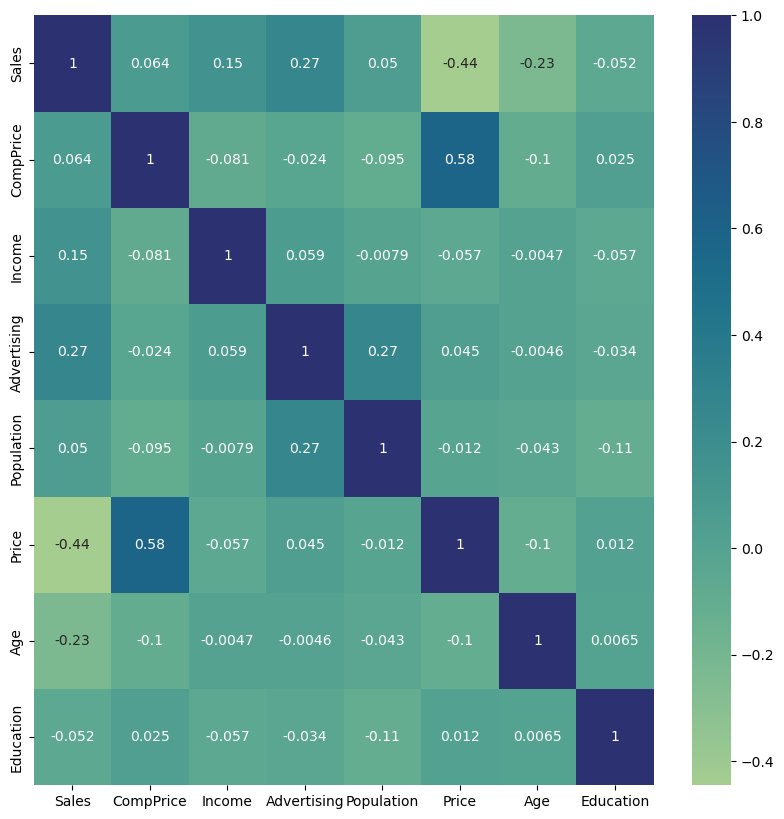

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="crest")

In [6]:
#encoding the categorical columns
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [7]:
col = list(df.columns)
col

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [8]:
df['ShelveLoc'].unique()

array([0, 1, 2])

In [9]:
df.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [10]:
#getting data for test train split
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [11]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [12]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [13]:
#splitting data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [14]:
#Building Decision Tree Classifier using Entropy Criteria
entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
entropy.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.45\nsamples = 320\nvalue = [76, 70, 174]'),
 Text(0.25, 0.625, 'x[0] <= 5.315\nentropy = 1.113\nsamples = 110\nvalue = [54, 2, 54]'),
 Text(0.125, 0.375, 'x[5] <= 159.5\nentropy = 1.117\nsamples = 74\nvalue = [44, 2, 28]'),
 Text(0.0625, 0.125, 'entropy = 1.039\nsamples = 70\nvalue = [44, 1, 25]'),
 Text(0.1875, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.375, 0.375, 'x[1] <= 116.0\nentropy = 0.852\nsamples = 36\nvalue = [10, 0, 26]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(0.4375, 0.125, 'entropy = 0.951\nsamples = 27\nvalue = [10, 0, 17]'),
 Text(0.75, 0.625, 'x[0] <= 10.485\nentropy = 1.329\nsamples = 210\nvalue = [22, 68, 120]'),
 Text(0.625, 0.375, 'x[5] <= 119.5\nentropy = 1.208\nsamples = 158\nvalue = [20, 30, 108]'),
 Text(0.5625, 0.125, 'entropy = 0.992\nsamples = 89\nvalue = [15, 6, 68]'),
 Text(0.6875, 0.125, 'entropy = 1.26\nsamples = 69\nvalue = [5, 24, 40]'),
 Text(0

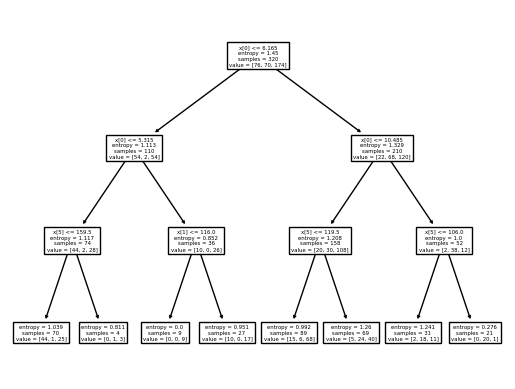

In [15]:
tree.plot_tree(entropy)

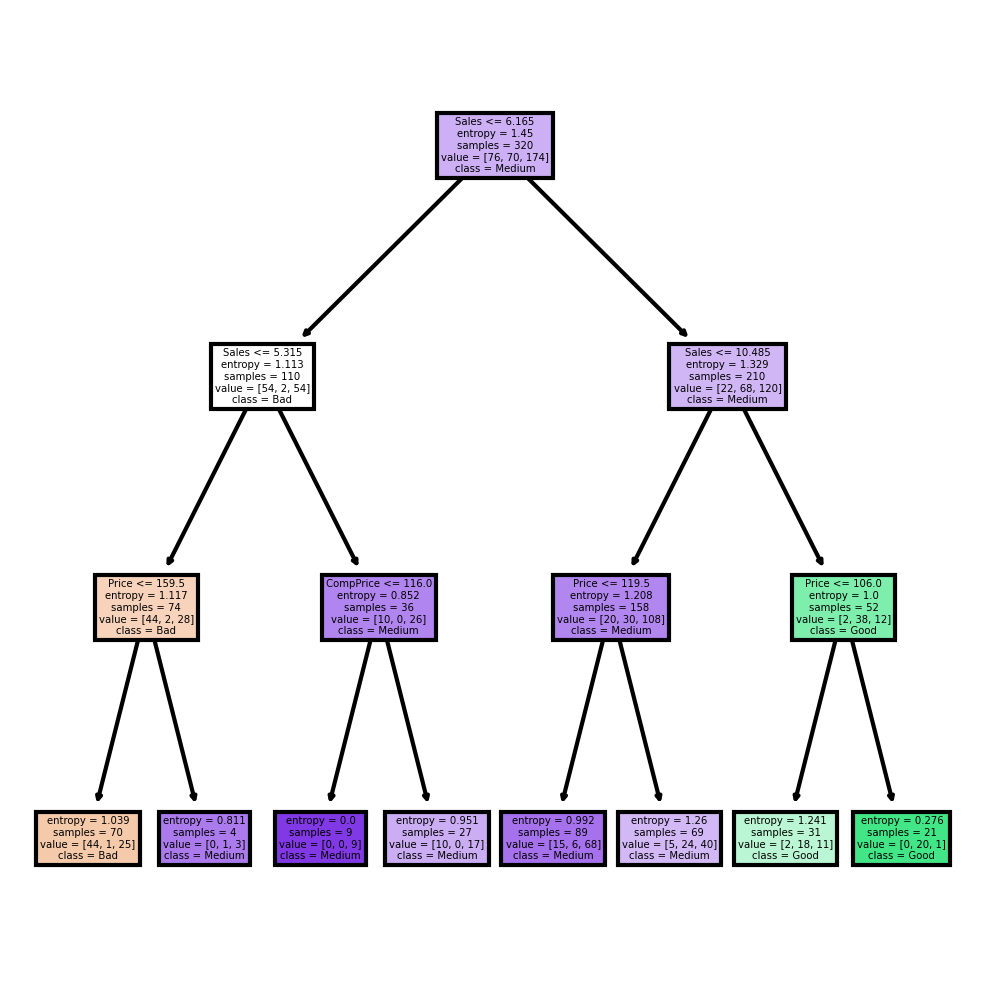

In [17]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
entropy.feature_importances_

array([0.75502836, 0.03506897, 0.        , 0.        , 0.        ,
       0.20990268])

In [19]:
feature = pd.Series(entropy.feature_importances_,index=fn).sort_values(ascending=False) 
feature

Sales          0.755028
Price          0.209903
CompPrice      0.035069
Income         0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

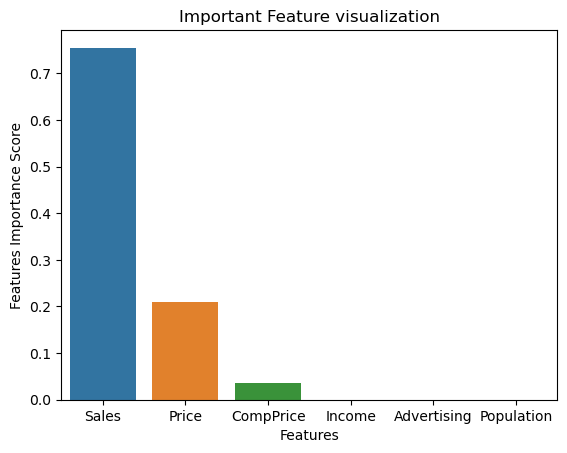

In [23]:
sns.barplot(x=feature.index, y=feature)
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Important Feature visualization")
plt.show()

In [24]:
#Predicting test data
y_pred = entropy.predict(x_test)                   
pd.Series(y_pred).value_counts()

2    52
0    18
1    10
dtype: int64

In [25]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
ShelveLoc,,,
0,6,1,13
1,0,6,9
2,12,3,30


In [26]:
np.mean(y_pred==y_test)

0.525

In [27]:
#Building Decision Tree Classifier (CART) using Gini Criteria
gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [28]:
gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 10.485\ngini = 0.6\nsamples = 320\nvalue = [76, 70, 174]'),
 Text(0.25, 0.625, 'x[0] <= 5.315\ngini = 0.544\nsamples = 268\nvalue = [74, 32, 162]'),
 Text(0.125, 0.375, 'x[2] <= 81.0\ngini = 0.503\nsamples = 74\nvalue = [44, 2, 28]'),
 Text(0.0625, 0.125, 'gini = 0.518\nsamples = 51\nvalue = [26, 1, 24]'),
 Text(0.1875, 0.125, 'gini = 0.355\nsamples = 23\nvalue = [18, 1, 4]'),
 Text(0.375, 0.375, 'x[5] <= 154.5\ngini = 0.475\nsamples = 194\nvalue = [30, 30, 134]'),
 Text(0.3125, 0.125, 'gini = 0.451\nsamples = 184\nvalue = [29, 24, 131]'),
 Text(0.4375, 0.125, 'gini = 0.54\nsamples = 10\nvalue = [1, 6, 3]'),
 Text(0.75, 0.625, 'x[5] <= 106.0\ngini = 0.411\nsamples = 52\nvalue = [2, 38, 12]'),
 Text(0.625, 0.375, 'x[2] <= 61.5\ngini = 0.533\nsamples = 31\nvalue = [2, 18, 11]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.6875, 0.125, 'gini = 0.574\nsamples = 22\nvalue = [2, 9, 11]'),
 Text(0.875, 0.375, 'x[2] <= 118.5\ngini = 0.

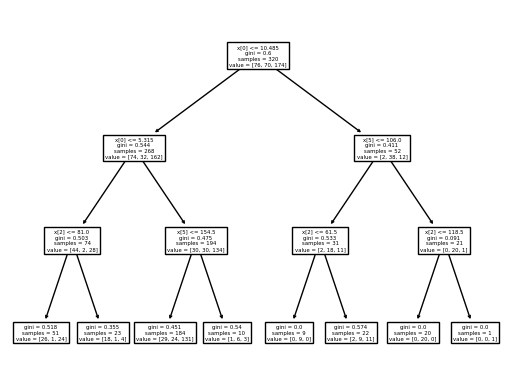

In [29]:
tree.plot_tree(gini)

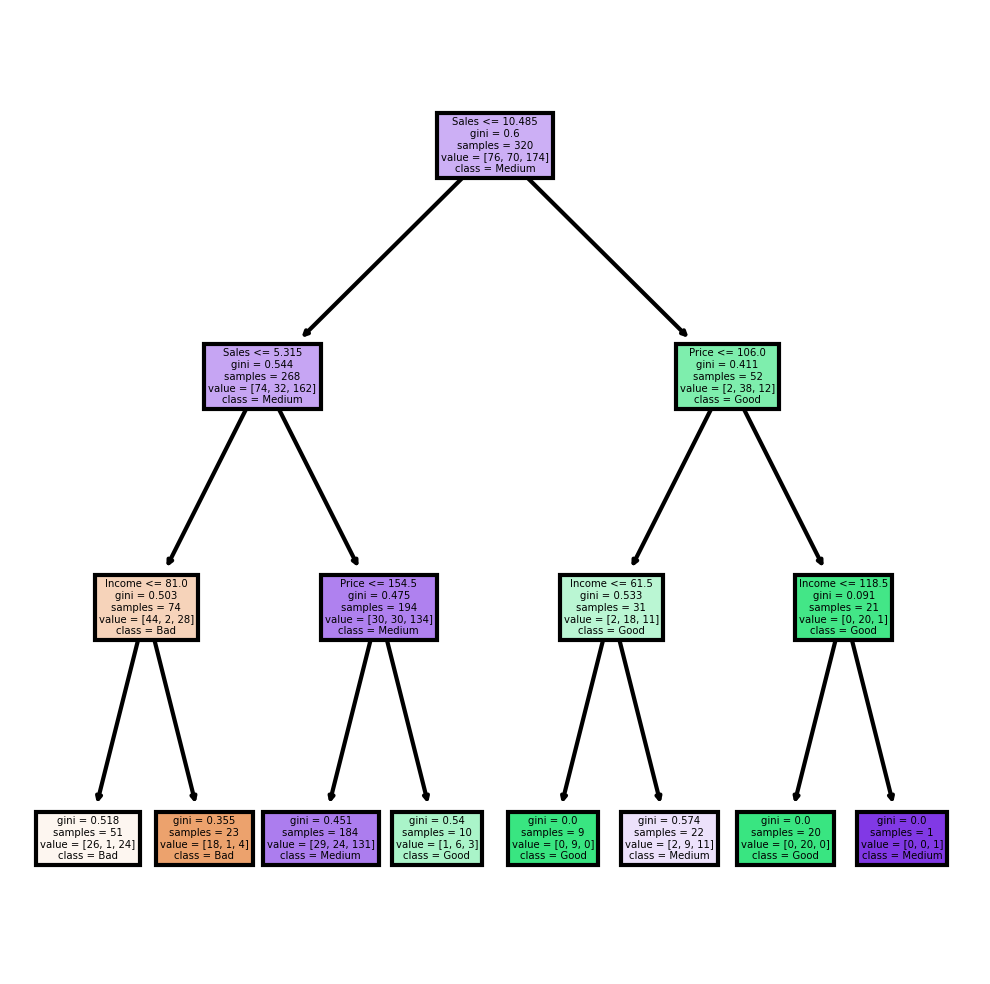

In [30]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
gini.feature_importances_

array([0.73266554, 0.        , 0.14850613, 0.        , 0.        ,
       0.11882832])

In [32]:
feature = pd.Series(gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature

Sales          0.732666
Income         0.148506
Price          0.118828
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

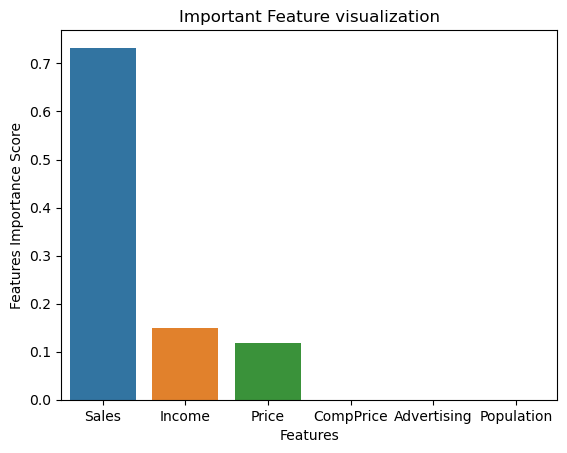

In [34]:
sns.barplot(x=feature.index, y=feature)
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Important Feature visualization")
plt.show()

In [35]:
#Predicting test data
y_pred = gini.predict(x_test)                   
pd.Series(y_pred).value_counts()

2    54
0    20
1     6
dtype: int64

In [36]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
ShelveLoc,,,
0,7,0,13
1,0,4,11
2,13,2,30


In [37]:
np.mean(y_pred==y_test)

0.5125

In [ ]:
#both models have different weightages as seen from both barplots where entropy gave importance to comprice while gini gave importance to income due to their horizontal vs vertical search algorithms